In [1]:
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 통계검정
import scipy.stats as stats

#  분류 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 분포
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

# 결측치처리
from sklearn.impute import SimpleImputer
#스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# 라벨인코더
from sklearn.preprocessing import LabelEncoder


## 파일 불러오기 및 합치기

In [2]:
# 고객데이터
df=pd.read_csv('member_data.csv')
df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [3]:
# 판매데이터
df1=pd.read_csv('product_data_001.csv')
df2=pd.read_csv('product_data_002.csv')
df3=pd.read_csv('product_data_003.csv')
df4=pd.read_csv('product_data_004.csv')

In [4]:
result= pd.concat([df1,df2,df3,df4], join='inner')
result

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
52565,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
52566,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
52567,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
52568,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23


## 고객데이터+판매데이터

In [5]:
# 판매데이터와 고객데이터를 회원번호를 기준으로 결합
dff = pd.merge(df, result, on=['회원번호','조합원상태'], how='left')
dff

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


### 데이터 추출

In [6]:
df5=dff[(dff['배송서비스신청여부']=='미신청')&(dff['연령']>=30)&(dff['연령']<70)]

In [7]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


- 고객데이터: df
- 판매데이터: result(각각의 데이터는 df1~df4)
- 전체 데이터 머지: dff
- 연령/배송서비스신청여부: df5

## 시간대별 eda

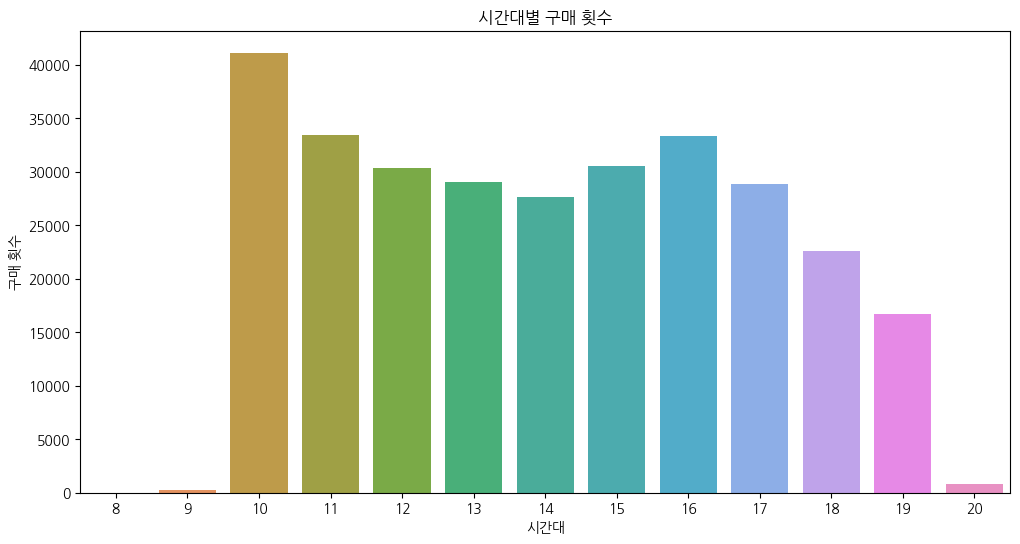

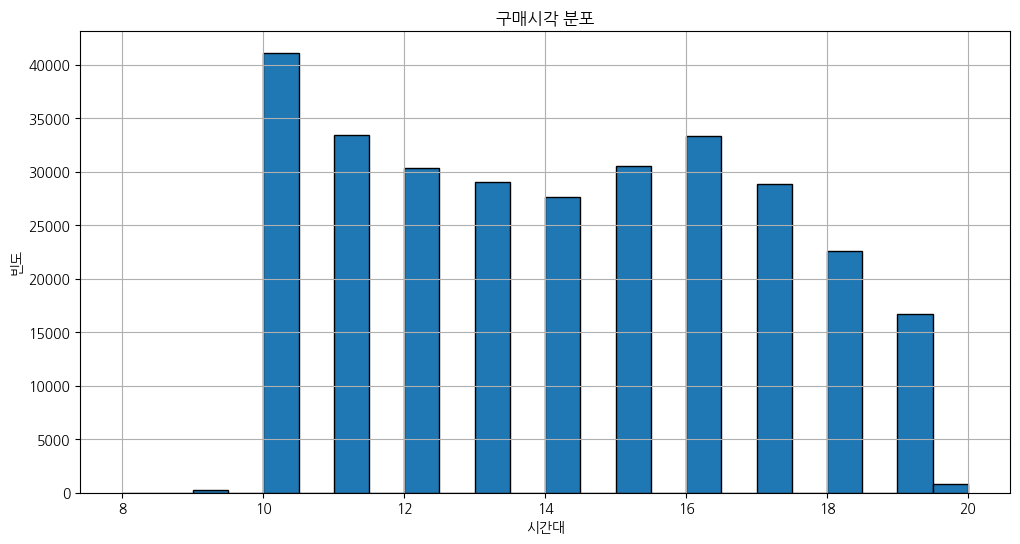

In [8]:
# '구매시각' 칼럼의 시계열 그래프
result['구매시각'] = pd.to_datetime(result['구매시각'])  # 시간 형식으로 변환
result['Hour'] = result['구매시각'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성

# 시간대별 구매 횟수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=result)
plt.title('시간대별 구매 횟수')
plt.xlabel('시간대')
plt.ylabel('구매 횟수')
plt.show()

# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
result['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

## 연령 분포 eda

In [9]:
a=df[df['성별']=='여']

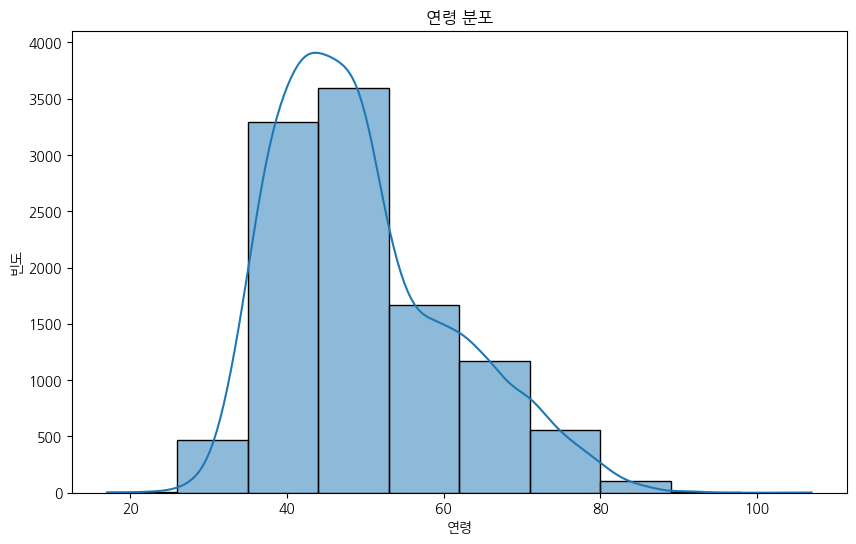

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(a['연령'], bins=10, kde=True)
plt.title('연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

## 구매금액 합에 따라 정렬(+성별)

In [11]:
# pivot_table 생성 후 구매금액 기준으로 내림차순 정렬
pivot_table_result = dff.pivot_table(index='회원번호', values='구매금액', aggfunc='sum')
sorted_pivot_table = pivot_table_result.sort_values(by='구매금액', ascending=False)

# 회원번호에 대해 성별을 추출
gender_by_member = dff[['회원번호', '성별']].drop_duplicates().set_index('회원번호')

# 결과 출력
final_result = sorted_pivot_table.join(gender_by_member)
final_result

,구매금액,성별
회원번호,,
1670400000,13060734,남
436681536,9559980,여
381879424,9002241,여
193003584,6327044,여
762476352,5672698,여
...,...,...
18764160,-88827,여
459849984,-102612,여
399893760,-104526,남


## 물품 대/중/소 분류 개수

In [12]:
dff['물품대분류'].describe()

count     294645
unique        16
top           채소
freq       75965
Name: 물품대분류, dtype: object

In [13]:
dff['물품중분류'].describe()

count     294645
unique        64
top        두부/유부
freq       21028
Name: 물품중분류, dtype: object

In [14]:
dff['물품소분류'].describe()

count     294645
unique       391
top           두부
freq       18793
Name: 물품소분류, dtype: object

## 지역

In [15]:
dff.pivot_table(index='구매매장', columns='주소',values='회원번호', aggfunc='count')

주소,광주-기타,광주-산성동,광주-오포읍,기타-궁내동,기타-금곡동,기타-금광동,기타-기타,기타-동백동,기타-동천동,기타-보라동,...,처인구-모현면,처인구-삼가동,처인구-역북동,처인구-원삼면,처인구-유방동,처인구-이동면,하남-기타,하남-위례동,화성-기타,화성-보라동
구매매장,,,,,,,,,,,,,,,,,,,,,
매장A,71.0,1.0,124.0,NaN,NaN,2.0,2101.0,NaN,NaN,NaN,...,17.0,3.0,52.0,3.0,NaN,2.0,46.0,NaN,121.0,NaN
매장B,161.0,1.0,60.0,NaN,NaN,NaN,1850.0,12.0,4.0,4.0,...,72.0,5.0,9.0,1.0,24.0,NaN,10.0,NaN,164.0,NaN
매장C,125.0,1.0,39.0,NaN,NaN,4.0,4362.0,NaN,NaN,78.0,...,33.0,3.0,30.0,19.0,37.0,NaN,55.0,2.0,270.0,8.0
매장D,62.0,1.0,15.0,3.0,10.0,NaN,2043.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,12.0,NaN,65.0,2.0


In [16]:
a=dff[dff['구매매장']=='매장A']
a.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장A',ascending=False).head(10)

구매매장,매장A
주소,
수지구-동천동,28727
수지구-풍덕천동,9022
기타-기타,2101
수지구-기타,2022
수지구-신봉동,1224
수지구-성복동,1168
수지구-상현동,997
수지구-죽전동,701
서울 강남구-기타,554


In [17]:
b=dff[dff['구매매장']=='매장B']
b.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장B',ascending=False).head(10)

구매매장,매장B
주소,
수지구-상현동,34276
수지구-풍덕천동,12287
기흥구-보정동,4401
수지구-성복동,4144
기타-기타,1850
수원 영통구-기타,857
수지구-신봉동,674
수지구-죽전동,660
기타-비조합원,441


In [18]:
c=dff[dff['구매매장']=='매장C']
c.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장C',ascending=False).head(10)

구매매장,매장C
주소,
수지구-풍덕천동,83625
수지구-성복동,9455
수지구-상현동,6369
수지구-신봉동,6121
기타-기타,4362
수지구-동천동,1466
수지구-죽전동,1183
분당구-정자동,1110
수원 영통구-기타,940


In [19]:
d=dff[dff['구매매장']=='매장D']
d.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장D',ascending=False).head(10)

구매매장,매장D
주소,
수지구-신봉동,37104
수지구-성복동,8104
기타-기타,2043
수지구-풍덕천동,1644
수지구-상현동,1381
수원 영통구-기타,675
수지구-기타,577
수지구-동천동,379
서울 강남구-기타,352


## 배송

### 고령이 몇살인지

In [20]:
a= dff[dff['배송서비스신청여부']=='신청']

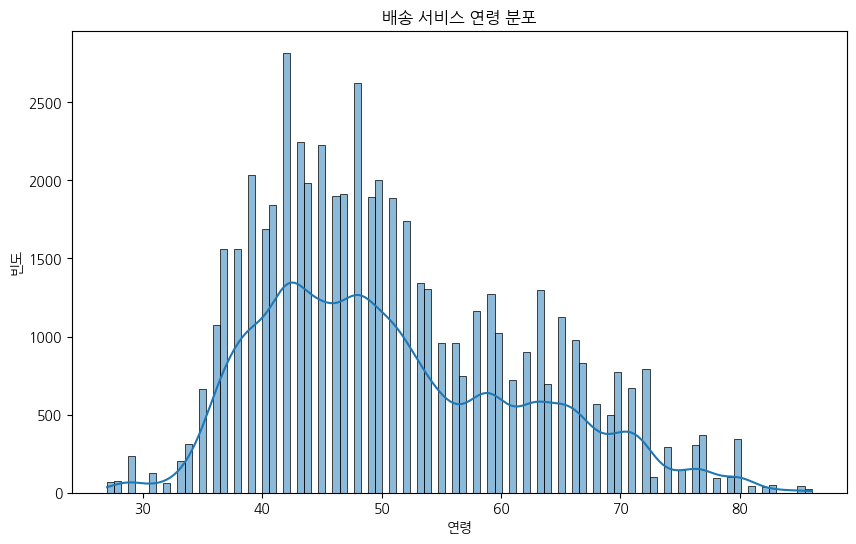

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(a['연령'], bins=100, kde=True)
plt.title('배송 서비스 연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

In [22]:
a

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
37,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-01,반찬,두부/유부,두부,두부(반모:270g),1.0,2872,매장C,NaN,14:09
38,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,생활용품,화장품,세안제/팩,자연그대로 거품세안제,-1.0,-28716,매장C,2022-01-05,16:19
39,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,간식,떡,가래떡,떡국떡(유기:800g),-1.0,-11295,매장C,2022-01-05,16:19
40,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,서류,감자,감자,감자(1kg),1.0,5743,매장C,NaN,16:17
41,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-11,채소,버섯,목이버섯,목이버섯(200g),1.0,6318,매장C,NaN,10:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-09-19,간식,잼/병조림/기타,잼,딸기잼(480g),4.0,52838,매장B,NaN,19:30
294551,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-05,수산,냉동수산,냉동패류,냉동굴(350g),1.0,8806,매장B,NaN,14:33
294552,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-10,채소,쌈채소류,상추,상추(200g),1.0,2680,매장B,NaN,18:40
294553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-21,축산물,알,유정란,유정란/매장용(15알/국내산),1.0,10338,매장B,NaN,18:22


In [23]:
a['회원번호'].nunique()

1043

In [24]:
# '구매시각' 칼럼의 시계열 그래프
dff['구매시각'] = pd.to_datetime(dff['구매시각'])  # 시간 형식으로 변환
dff['Hour'] = dff['구매시각'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성

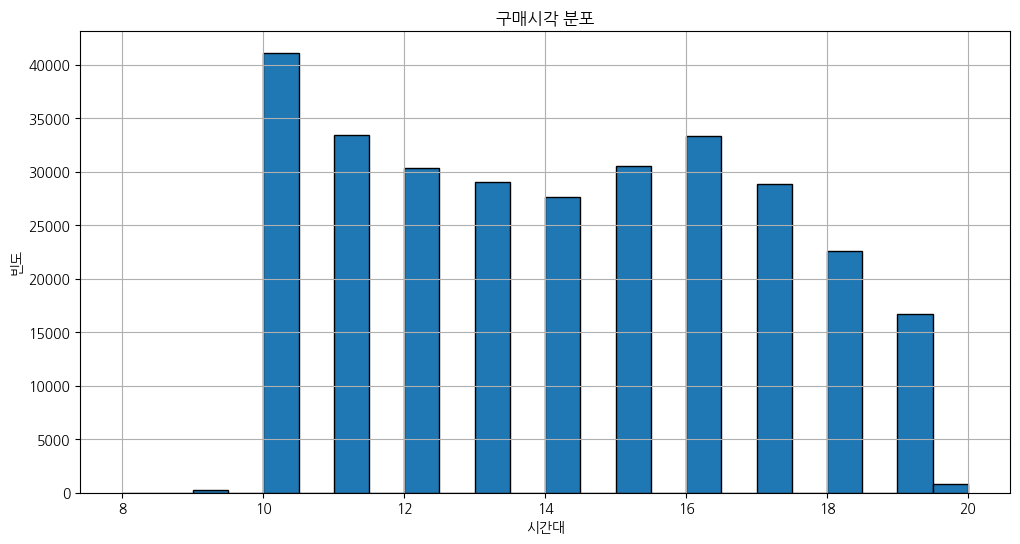

In [25]:
# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
dff['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

In [26]:
# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
a['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

KeyError: 'Hour'

<Figure size 1200x600 with 0 Axes>

# 1. 예상판매시점  

**1) 예상판매시점  
(팝업을 띄운다)**

> 예상판매시점이 하나의 시간인지, n개의 시간인지
시간인지 분인지 날짜인지.
week에 대한 분석,, 아침 몇시에 대한 예측,, 예측 시점 ,,? 에측 시점을 제대로 정해야함 당장 1시간 뒤 예측 필요없음
y값이 시간대보다는 주말오전 등 카테고리컬해야 좋음.
단 예측이 잘 안나올 수 있음.
랜덤포레스트 ㄱㄱ
평일 오전(12시 이전) / 평일 오후(1: 12~3) 평일 오후(2: 3~6) / 평일 저녁(6시 이후) / 주말 오전 / 주말 오후
> 

예상 판매 시간에 알림 효과 ★ (신규고객 - 분류)

**y 시간     x 구매금액 / VIP여부 / 주소 / 연령 / 중분류 / 반품신청여부/ 성별**

factor를 고른 이유 적을 것 , 중분류(라벨인코더), 어떤 피쳐가 유의미한가, 왠만하면 다 때려박기

1. 재구매 알림 서비스
    1. 고객의 이전 구매 패턴을 분석하여 특정 상품의 재구매 주기를 예측, 재구매 시기가 다가왔을 때 고객에게 알림을 보내는 기능 제공

In [27]:
df5['공급일자'] = pd.to_datetime(df5['공급일자'])

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/56213017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['공급일자'] = pd.to_datetime(df5['공급일자'])


In [28]:
df5['요일']=df5['공급일자'].dt.weekday
df5.head(10)

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/2686644170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['요일']=df5['공급일자'].dt.weekday


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27,2
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27,2
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27,2
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27,2
5,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장C,NaN,13:27,2
6,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,7곡딸기롤과자(100g/10개입),1.0,6126,매장C,NaN,13:27,2
7,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,버섯,팽이버섯,팽이버섯(150g),1.0,1149,매장C,NaN,16:39,2
8,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,버섯,만가닥버섯,갈색만가닥버섯(150g),1.0,2967,매장C,NaN,16:39,2
9,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-26,채소,열매채소,피망,피망(3개/210g이상),1.0,3829,매장C,NaN,17:16,4


In [29]:
df5['a'] = pd.to_datetime(df5['구매시각'])

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/2692583105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['a'] = pd.to_datetime(df5['구매시각'])


In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217769 entries, 0 to 294644
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   회원번호         217769 non-null  int64         
 1   조합원상태        217769 non-null  object        
 2   주소           217769 non-null  object        
 3   성별           217768 non-null  object        
 4   연령           217769 non-null  float64       
 5   배송서비스신청여부    217769 non-null  object        
 6   모바일알람여부      217769 non-null  object        
 7   Gold_member  217769 non-null  object        
 8   공급일자         217769 non-null  datetime64[ns]
 9   물품대분류        217769 non-null  object        
 10  물품중분류        217769 non-null  object        
 11  물품소분류        217769 non-null  object        
 12  물품명          217769 non-null  object        
 13  구매수량         217769 non-null  float64       
 14  구매금액         217769 non-null  int64         
 15  구매매장         217769 non-null  obje

In [31]:
df5['시각'] = df5['a'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성
df5.head(10)

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/2375194472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['시각'] = df5['a'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
5,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
6,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,스낵,7곡딸기롤과자(100g/10개입),1.0,6126,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
7,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,...,팽이버섯,팽이버섯(150g),1.0,1149,매장C,NaN,16:39,2,2024-02-14 16:39:00,16
8,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,...,만가닥버섯,갈색만가닥버섯(150g),1.0,2967,매장C,NaN,16:39,2,2024-02-14 16:39:00,16
9,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-26,채소,...,피망,피망(3개/210g이상),1.0,3829,매장C,NaN,17:16,4,2024-02-14 17:16:00,17


In [32]:
df5['주말여부']=df5['요일'].apply(lambda x: '주말' if (x==5)&(x==6) else '평일')
df5.head(5)

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/684609648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['주말여부']=df5['요일'].apply(lambda x: '주말' if (x==5)&(x==6) else '평일')


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,두부(1모:420g),2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일


In [33]:
df5['시간대'] = df5['시각'].apply(lambda x: '오전' if (x>=9)&(x<12) else('낮1' if (x>=12)&(x<15) else ('낮2' if (x>=15)&(x<18) else '저녁')))
df5.head(5)

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/1951137633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['시간대'] = df5['시각'].apply(lambda x: '오전' if (x>=9)&(x<12) else('낮1' if (x>=12)&(x<15) else ('낮2' if (x>=15)&(x<18) else '저녁')))


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부,시간대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일,낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1


In [34]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부,시간대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일,낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,1.0,27759,매장B,NaN,13:29,5,2024-02-14 13:29:00,13,평일,낮1
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,1.0,6700,매장B,NaN,17:45,6,2024-02-14 17:45:00,17,평일,낮2
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,1.0,5360,매장B,NaN,10:06,0,2024-02-14 10:06:00,10,평일,오전
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,1.0,4212,매장B,NaN,10:06,0,2024-02-14 10:06:00,10,평일,오전


In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217769 entries, 0 to 294644
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   회원번호         217769 non-null  int64         
 1   조합원상태        217769 non-null  object        
 2   주소           217769 non-null  object        
 3   성별           217768 non-null  object        
 4   연령           217769 non-null  float64       
 5   배송서비스신청여부    217769 non-null  object        
 6   모바일알람여부      217769 non-null  object        
 7   Gold_member  217769 non-null  object        
 8   공급일자         217769 non-null  datetime64[ns]
 9   물품대분류        217769 non-null  object        
 10  물품중분류        217769 non-null  object        
 11  물품소분류        217769 non-null  object        
 12  물품명          217769 non-null  object        
 13  구매수량         217769 non-null  float64       
 14  구매금액         217769 non-null  int64         
 15  구매매장         217769 non-null  obje

In [36]:
def func(x):
    if (x['주말여부'] == '평일') & (x['시간대'] == '오전') :
        return '평일오전'
    elif (x['주말여부'] == '평일') & (x['시간대'] == '낮1') :
        return '평일낮1'
    elif (x['주말여부'] == '평일') & (x['시간대'] == '낮2') :
        return '평일낮2'
    elif (x['주말여부'] == '평일') & (x['시간대'] == '저녁') :
        return '평일저녁'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '오전') :
        return '주말오전'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '낮1') :
        return '주말낮1'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '낮2') :
        return '주말낮2'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '저녁') :
        return '주말저녁'

df5['구매시점'] = df5.apply(func, axis=1)
df5.head(5)


/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/4115643138.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['구매시점'] = df5.apply(func, axis=1)


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부,시간대,구매시점
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일,낮2,평일낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1


In [37]:
del df5['a']
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,2.0,7658,매장B,NaN,16:11,0,16,평일,낮2,평일낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,5743,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,4786,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,2.0,7083,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,3829,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,1.0,27759,매장B,NaN,13:29,5,13,평일,낮1,평일낮1
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,1.0,6700,매장B,NaN,17:45,6,17,평일,낮2,평일낮2
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,1.0,5360,매장B,NaN,10:06,0,10,평일,오전,평일오전
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,1.0,4212,매장B,NaN,10:06,0,10,평일,오전,평일오전


## 모바일알람여부

In [45]:
df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('.', '0')
df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('수신', '1')

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/3851903420.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('.', '0')
/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/3851903420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('.', '0')
/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/3851903420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [47]:
df5['모바일알람여부'] = df5['모바일알람여부'].astype(int)

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/1181601560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['모바일알람여부'] = df5['모바일알람여부'].astype(int)


## 배송서비스

In [48]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,0,normal,2022-06-13,반찬,...,2.0,7658,매장B,NaN,16:11,0,16,평일,낮2,평일낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,0,normal,2022-10-12,간식,...,1.0,5743,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,0,normal,2022-10-12,간식,...,1.0,4786,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,0,normal,2022-10-12,간식,...,2.0,7083,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,0,normal,2022-10-12,간식,...,1.0,3829,매장C,NaN,13:27,2,13,평일,낮1,평일낮1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,0,normal,2022-10-08,축산물,...,1.0,27759,매장B,NaN,13:29,5,13,평일,낮1,평일낮1
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,0,normal,2022-10-16,서류,...,1.0,6700,매장B,NaN,17:45,6,17,평일,낮2,평일낮2
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,0,normal,2022-10-24,간식,...,1.0,5360,매장B,NaN,10:06,0,10,평일,오전,평일오전
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,0,normal,2022-10-24,채소,...,1.0,4212,매장B,NaN,10:06,0,10,평일,오전,평일오전


In [49]:
df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('미신청', '0')
df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('신청', '1')

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/1979732283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('미신청', '0')
/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/1979732283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('신청', '1')


In [50]:
df5['배송서비스신청여부'] = df5['배송서비스신청여부'].astype(int)

/var/folders/y4/1nbsm55s7ln7mx45d4bwvgmr0000gn/T/ipykernel_60993/3194006036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['배송서비스신청여부'] = df5['배송서비스신청여부'].astype(int)
